<a href="https://colab.research.google.com/github/andrejfg/Algoritmo-de-Classificao-com-Selecao-de-Atributos/blob/main/Algoritmos_de_Classifica%C3%A7%C3%A3o_com_Busca_Gen%C3%A9tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de Classificação com Busca Genética

A proposta do algoritmo é tentar descobrir os K melhores atributos que classificam melhor se uma molécula é biodegradável ou não por busca genética.

Algoritmos de Classificação considerados:
*   Regressão Logística
*   Árvore de Decisão
*   Árvore Aleatória





##Importações


*   Random: Está sendo usado para embaralhar uma lista
*   Pandas: Está sendo usado para carregar os dados dsv
*   numpy: Está sendo usado para algumas operações com arrays
*   Matplot: Usado para fazer o gráfico de comparação entre os modelos
*   Sklearn: Usado para preprocessamento e analise dos dados

In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

## Variáveis de Execução

*   K: Números de index considerados para o modelo 
*   propMutacao: Probabilidade de mutação ao gerar novos filhos
*   population_size: Tamanho da População
*   nGerations: Número de Gerações

In [ ]:
k = 5
probMutacao = 0.2
population_size = 200
nGerations = 500
path_of_csv = PATH_OF_CSV

## Definição da classe modelo
A classe modelo é a abstração de todas as classificações consideradas. Ao gerar um novo modelo, deve informar qual tipo de classificar deseja:

1.   Regressão Logistica
2.   Árvore de Decisão
3.   Árvore Aleatória




In [ ]:
class Modelo:
  def __init__(self, tipo, indices):
    self.indices = indices
    if tipo == 1:
      self.modelo = LogisticRegression(C=10)  
    elif tipo == 2:
        self.modelo = tree.DecisionTreeClassifier()
    elif tipo == 3:
        self.modelo = RandomForestClassifier()
    self.accuracy = 0
    self.alreadyTrained = False


  def getIndices(self):
    return self.indices
  
  def getModelo(self):
    return self.modelo

  def getAccuracy(self):
    return (self.accuracy)

  def getAlreadyTrained(self):
    return self.alreadyTrained
  
  def setAccuracy(self, y_test, y_predicao):
    self.accuracy = accuracy_score(y_test , y_predicao)
    return self.accuracy
  
  def fit(self, X_train , y_train):
    self.modelo.fit(X_train[:,self.indices], y_train)
    self.alreadyTrained = True

  def getFmeasure(self, y_test, y_predicao):
    return f1_score(y_test ,y_predicao ,labels=[NRB, RB] )
    
  def predict(self, X_test):
    return self.modelo.predict(X_test[:,self.indices])

##Preprocessamento dos dados

###Carregamento dos dados

In [ ]:
# Carregar os dados
df = pd.read_csv(path_of_csv, delimiter=",",header=None)

###Separação do Conjunto X

In [ ]:
# Matriz de conjunto de dados
X_base = df.values[1:,1:-1]
pd.DataFrame(X_base)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,0,2.949,1.591,0,7.253,0,0
1,4.17,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,0,3.315,1.967,0,7.257,0,0
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,0,1,3.076,2.417,0,7.601,0,0
3,3,2.7098,0,0,0,0,0,20,0,2,...,0,0,0,1,3.046,5,0,6.69,0,0
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,0,3.351,2.405,0,8.003,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,5.431,2.8955,0,0,0,2,0,32.1,4,1,...,2,0,6,1,3.573,2.242,1,8.088,0,0
752,5.287,3.3732,0,0,9,0,0,35.3,0,9,...,0,0,3,0,3.787,3.083,3,9.278,0,0
753,4.869,1.767,0,1,9,0,5,44.4,0,4,...,0,4,13,0,3.848,2.576,5,9.537,1,0
754,5.158,1.6914,2,0,36,0,9,56.1,0,0,...,0,1,16,0,5.808,2.055,8,11.055,0,1


###Separação do conjunto y (target)

In [ ]:
#Matriz de conjunto de Rótulos
y_base = df.values[1:,-1:]
pd.DataFrame(y_base)

,0
0,RB
1,RB
2,RB
3,RB
4,RB
...,...
751,NRB
752,NRB
753,NRB
754,NRB


###Normalização de X

In [ ]:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X_base)
pd.DataFrame(X)
k_max = len(X[0])

###Normalização de y

In [ ]:
## NORMALIZANDO A BASE DE RÓTULOS 
le = preprocessing.LabelEncoder()
y = le.fit_transform(y_base.ravel())
pd.DataFrame(y)
#list(le.inverse_transform(Y))

,0
0,1
1,1
2,1
3,1
4,1
...,...
751,0
752,0
753,0
754,0


##Funções auxiliares para execução do genetic_Classifier

###cromossomoUnico
  É usado para que a primeira geração de população tenha cromossomos únicos entre si

In [ ]:
def cromossomoUnico(cromossomo, populacao):
  unico = True
  for i in populacao:
    if np.array_equiv(cromossomo , i):
      unico = False
      break

  return unico

###geraPopulacaoInicial
  Gera a primeira geração da execução

In [ ]:
def geraPopulacaoInicial(k,k_max,size):
  population = []
  index = np.arange(k_max)
  for i in range(size):
    while True:
      cromossomo = random.sample(list(index) , k)
      cromossomo = np.sort(cromossomo)
      if cromossomoUnico(cromossomo,population):
        break
    population.append(cromossomo)


  return population

###geraModelos
Gera os modelos da primeira geração

In [ ]:
def geraModelos(tipo, population):
  models = []
  for i in range(len(population)):
    model = Modelo( tipo, population[i])
    models.append(model)
  return models

###treinaModelos
Realiza o fit para cada geração.

obs: A verificação dentro do for garante que o fit não repita o trabalho nos modelos que já foram treinados.

In [ ]:
def treinaModelos( models , X_train , y_train ):
  for i in range(len(models)):
    if models[i].getAlreadyTrained() == False :
      models[i].fit(  X_train , y_train.ravel() )
 
  return models

###avaliaModelos
Calcula o score entre a predição e o rótulo desejado

In [ ]:
def avaliaModelos( models , X_test , y_test , best_historic ):
  best_of_generation = models[1]
  for i in range(len(models)):
    #predição dos modelos
    y_predicao = models[i].predict(X_test)
    #avalia a acurácia
    models[i].setAccuracy(y_test, y_predicao)
    if best_of_generation.getAccuracy() < models[i].getAccuracy():
      best_of_generation = models[i]

  if best_historic[-1].getAccuracy() >  best_of_generation.getAccuracy():
      best = best_historic[-1]
  else:
      best = best_of_generation

  return models , best

###torneioDeModelos
O torneio de modelos realiza o torneio entre os modelos, o fitness considerado é o score calculado pelo "avaliaModelos"

Método de torneio:
1 contra 1 aleatório

o vetor de modelos é reduzido pela metade

In [ ]:
def torneioDeModelos( models ):
  newModels = []
  np.random.shuffle(models)
  for i in range(int(len(models)/2)):
    if models[i].getAccuracy() > models[-i-1].getAccuracy():
      newModels.append(models[i])
    else:
      newModels.append(models[-i-1])

  return newModels

###geraNovaPopulacao
Esta função gera a nova população após o torneio

o vetor de modelos dobra de tamanho

In [ ]:
def geraNovaPopulacao(tipo, models , probMutacao, k ,k_max ):
  newModels = models.copy()
  np.random.shuffle(models)

  for i in range(int(len(models)/2)):
    child_index_1 = np.array_split(models[i].getIndices(),2)
    child_index_2 = np.array_split(models[-i-1].getIndices(),2)
    child_1 = np.concatenate((child_index_1[0], child_index_2[1]), axis=None)
    child_2 = np.concatenate((child_index_2[0], child_index_1[1]), axis=None)

    #Mutaçao para o primeiro filho
    if np.random.rand() < probMutacao:
      child_1[np.random.randint(0, k)] = np.random.randint(0, k_max)
    if np.random.rand() < probMutacao:
      child_2[np.random.randint(0, k)] = np.random.randint(0, k_max)

    newModels.append(Modelo( tipo , child_1 ))
    newModels.append(Modelo( tipo , child_2 ))

  return newModels

##genetic_Classifier
É a execução do algoritmo genético para os classificadores

retorna o melhor modelo atual e o histórico de melhores modelos

In [ ]:
def genetic_Classifier( tipo , X , y , k = 5, k_max = 41, population_size = 200, probMutacao = 0.1, nGerations = 1000 ):
  best_historic = []
  #Separa conjunto de Treino e Teste
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
  #definir indices da população inicial 
  population = geraPopulacaoInicial(k , k_max , population_size)
  #gera os modelos
  models = geraModelos( tipo , population )
  best_historic.append(models[1])
  for i in range(nGerations):    
    models = treinaModelos( models , X_train , y_train ) 
    models , best = avaliaModelos( models , X_test , y_test , best_historic ) 
    best_historic.append(best)
    models = torneioDeModelos( models )
    models = geraNovaPopulacao( tipo , models , probMutacao , k , k_max )
    print(f"Geração {i}:  {(best_historic[-1].getAccuracy()*100):.2f}% {(best_historic[-1].getIndices())}")
  return best_historic[-1] , best_historic


## Execução do algoritmo

###Execução para Regressão Logística

In [ ]:
model_LogisticRegression, historic_LogisticRegression = genetic_Classifier(1, X , y , k , k_max , population_size , probMutacao , nGerations )
historico_de_evolucao_LogisticRegression = []
for i in historic_LogisticRegression:
  historico_de_evolucao_LogisticRegression.append(i.getAccuracy())

Geração 0:  82.82% [ 4  5 29 34 35]
Geração 1:  82.82% [ 4  5 29 34 35]
Geração 2:  84.58% [ 8 14 29 24 37]
Geração 3:  84.58% [ 8 14 29 24 37]
Geração 4:  84.58% [ 8 14 29 24 37]
Geração 5:  84.58% [ 8 14 29 24 37]
Geração 6:  84.58% [ 8 14 29 24 37]
Geração 7:  85.02% [ 8 14 29 24 33]
Geração 8:  85.02% [ 8 14 29 24 33]
Geração 9:  87.22% [ 8 14 29 37 40]
Geração 10:  87.22% [ 8 14 29 37 40]
Geração 11:  87.22% [ 8 14 29 37 40]
Geração 12:  87.22% [ 8 14 29 37 40]
Geração 13:  87.67% [ 4  0 29 37 40]
Geração 14:  87.67% [ 4  0 29 37 40]
Geração 15:  87.67% [ 4  0 29 37 40]
Geração 16:  87.67% [ 4  0 29 37 40]
Geração 17:  87.67% [ 4  0 29 37 40]
Geração 18:  87.67% [ 4  0 29 37 40]
Geração 19:  87.67% [ 4  0 29 37 40]
Geração 20:  87.67% [ 4  0 29 37 40]
Geração 21:  87.67% [ 4  0 29 37 40]
Geração 22:  88.11% [38  0 29 37 40]
Geração 23:  88.11% [38  0 29 37 40]
Geração 24:  88.11% [38  0 29 37 40]
Geração 25:  88.11% [38  0 29 37 40]
Geração 26:  88.11% [38  0 29 37 40]
Geração 27:

###Execução para Árvore de Decisão

In [ ]:
model_DecisionTree, historic_DecisionTree = genetic_Classifier(2, X , y , k , k_max , population_size , probMutacao , nGerations )
historico_de_evolucao_DecisionTree = []
for i in historic_DecisionTree:
  historico_de_evolucao_DecisionTree.append(i.getAccuracy())

Geração 0:  77.97% [ 5 10 16 22 35]
Geração 1:  78.85% [ 5 24 33 39 40]
Geração 2:  78.85% [ 7 16 20 35 37]
Geração 3:  81.94% [ 2  5 10 22 32]
Geração 4:  81.94% [ 2  5 10 22 32]
Geração 5:  81.94% [ 2  5 10 22 32]
Geração 6:  81.94% [ 2  5 10 22 32]
Geração 7:  81.94% [ 2  5 10 22 32]
Geração 8:  81.94% [ 5 24 33  4 40]
Geração 9:  81.94% [ 5 24 33  4 40]
Geração 10:  81.94% [ 5 24  4 33 40]
Geração 11:  81.94% [ 5 24  4 33 40]
Geração 12:  81.94% [ 5 24 33  4 40]
Geração 13:  81.94% [ 5 24  4 33 40]
Geração 14:  81.94% [ 5 24  4 33 40]
Geração 15:  83.26% [10  5  9 24 33]
Geração 16:  83.26% [10  5  9 24 33]
Geração 17:  83.26% [10  5  9 24 33]
Geração 18:  83.26% [10  5  9 24 33]
Geração 19:  83.26% [10  5  9 24 33]
Geração 20:  83.26% [10  5  9 24 33]
Geração 21:  83.26% [10  5  9 24 33]
Geração 22:  83.26% [10  5  9 24 33]
Geração 23:  83.26% [10  5  9 24 33]
Geração 24:  83.26% [10  5  9 24 33]
Geração 25:  83.26% [10  5  9 24 33]
Geração 26:  83.26% [10  5  9 24 33]
Geração 27:

###Execução para Árvore Aleatória

In [ ]:
model_RandomTree, historic_RandomTree = genetic_Classifier(3, X , y , k , k_max , population_size , probMutacao , nGerations )
historico_de_evolucao_RandomTree = []
for i in historic_RandomTree:
  historico_de_evolucao_RandomTree.append(i.getAccuracy())

Geração 0:  82.38% [ 7 20 26 35 38]
Geração 1:  85.90% [ 0  9 16 37 38]
Geração 2:  85.90% [ 0  9 16 37 38]
Geração 3:  85.90% [ 0  9 16 37 38]
Geração 4:  85.90% [ 0  9 16 37 38]
Geração 5:  85.90% [ 0  9 16 37 38]
Geração 6:  85.90% [ 0  9 16 37 38]
Geração 7:  85.90% [ 0  9 16 37 38]
Geração 8:  86.34% [ 0 29 16 33 35]
Geração 9:  86.34% [ 0 29 16 33 35]
Geração 10:  86.34% [ 0 29 16 33 35]
Geração 11:  86.78% [ 0  9 33 33 35]
Geração 12:  86.78% [ 0  9 33 33 35]
Geração 13:  86.78% [ 0  9 33 33 35]
Geração 14:  86.78% [ 0  9 33 33 35]
Geração 15:  86.78% [ 0  9 33 33 35]
Geração 16:  86.78% [ 0  9 10 33 38]
Geração 17:  87.22% [ 0  9 16 33 38]
Geração 18:  87.22% [ 0  9 16 33 35]
Geração 19:  87.22% [ 0  9 16 33 35]
Geração 20:  87.22% [ 0  9 16 33 35]
Geração 21:  87.22% [ 0  9 16 33 38]
Geração 22:  87.22% [ 0  9 16 33 38]
Geração 23:  87.67% [ 0  9 16 33 40]
Geração 24:  87.67% [ 0  9 16 33 40]
Geração 25:  87.67% [ 0  9 18 33 38]
Geração 26:  87.67% [ 0  9 18 33 38]
Geração 27:

#Gráfico de Evolução


*   Azul: Regressão Logística
*   Laranja: Árvore de Decisão
*   Verde: Árvore Aleatória



In [ ]:
print(f"""Melhores indices encontrados:
Regressão Logística: {np.sort(model_LogisticRegression.getIndices())}
Árvore de Decisão: {np.sort(model_DecisionTree.getIndices())}
Árvore Aleatória: {np.sort(model_RandomTree.getIndices())}
""")


Melhores indices encontrados:
Regressão Logística: [ 0 29 37 38 40]
Árvore de Decisão: [ 4  5 31 33 40]
Árvore Aleatória: [ 0  9 33 38 39]



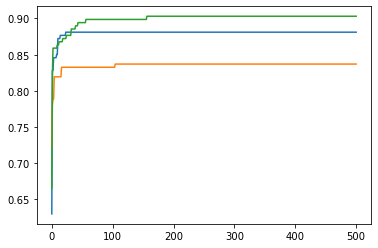

In [ ]:
fig, ax = plt.subplots()
limitante = nGerations

x = np.linspace(0,limitante,limitante)

ax.plot(x, historico_de_evolucao_LogisticRegression[:limitante]) #azul
ax.plot(x, historico_de_evolucao_DecisionTree[:limitante]) #laranja
ax.plot(x, historico_de_evolucao_RandomTree[:limitante]) #verde

plt.show()